# Data Exploration
 
## Variable Identification and analysis

#### Univariate Analysis
- Adherence to model’s underlying assumptions

#### Multivariate Analysis
- Identify data weak points and non-normality in distribution
- Identifying co linearity between data fields

#### OLS (ordinary least squares) assumptions:
1. The regression model is linear in the coefficients and the error term
2. The error term has a population mean of zero
3. All independent variables are uncorrelated with the error term
4. Observations of the error term are uncorrelated with each other
5. The error term has a constant variance (no heteroscedasticity)
6. No independent variable is a perfect linear function of other explanatory variables
7. The error term is normally distributed (optional)

#### Outlier detection and treatment
visualise the data through box-plots, histograms and scatter plots to identify outliers. This step can be performed in conjunction with uni/multi variate analysis.

- deletion
- transformation 
- treat seperately within own category

##### Variable transformation
If decided to integrate the outliers through transformation of data, the impact of the transformation on the model must be considered. Some predictive models make assumption regarding the underlying data such as adherence to normal distribution of data. The following transformation are to be made in accordance to the data:
- binning 
- logarithm (right skew)
- square or cube root (left skew)
  
#### Missing values treatment 
- mean/mode/median imputation (naive stats)
     - generalised imputation: replaced with average of non-missing values
     - similar case imputation: replace with average of class
- K-Nearest Neighbours imputation

## Feature engineering
Based on the choice of the variables, they can be featurised and lemmatised to be included in the model. The uni/multi variate analysis will give us insight into the relationship between the values and their predictive ability. If given the current data, predicitvity is low, it can be improved through featurisation or binning of certain fields to increase their impact on the model. For example, the addresses and postcodes can be binned to represent whole regions instead of granualised individuals. Additionally, this can be done with age groups, job titles and other fields as well. 



# Model Development
## Logistic regression
 
 
# Interpretation

1. Test model performance
    - Goodness of fit
        - Likelihood Ratio Test
        - Pseudo R squared
        - Homer-Lemeshow Test
    - Statistical test for individual predictors
        - Wald Test
    - Validation of predicted Values
        - ROC Curve
        - Classification Rate
        - K-fold Cross Validation
2. What can we do with the results?
    - Identify  potential customers for targeting
    - Finding probability of a potential buyer to becoming a customer
    - Identify the “persuadable” population


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import scipy.stats.distributions 

In [2]:
importpath = "E:\GitHub\Python-Projects\Hobby\Machine Learning\Graduate Admission"

In [3]:
df = pd.read_csv(f"{importpath}\datasets_14872_228180_Admission_Predict.csv")
df = df.rename(columns={"LOR ":"LOR", "Chance of Admit ": "Chance of Admit"})
df = df.drop(["Serial No."],axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [30]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Missing values Treatment

no nulls present

In [47]:
for column in df.columns:
    if bool(True) in df[column].isnull().unique():
        print(column)

# Univariate Analysis

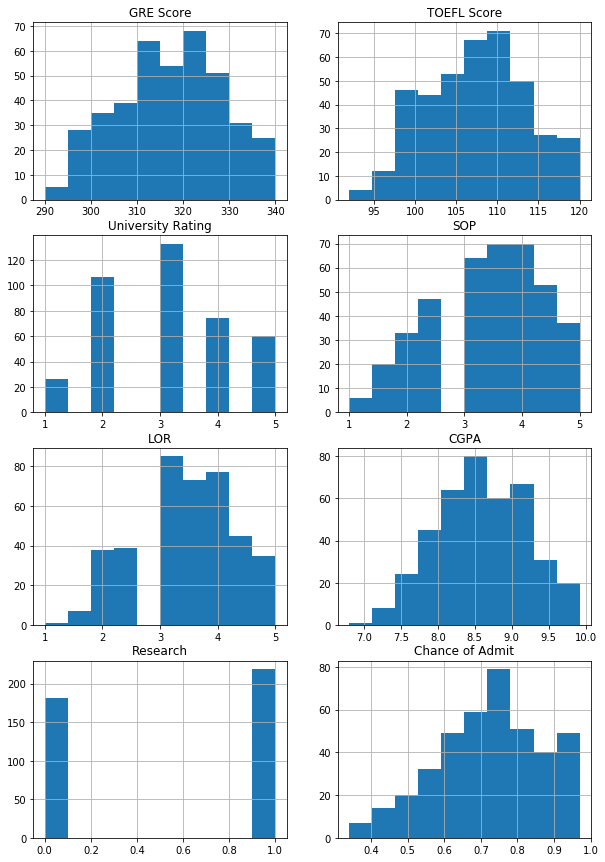

In [31]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = [10,15])
for i in range(4):
    for j in range(2):
        df[df.columns[i*2+j]].hist(ax=axes[i,j])
        axes[i,j].set_title(df.columns[i*2+j])

In [35]:
# fig, axes = plt.subplots(nrows=2 ,ncols=2, figsize=[15,5])
# df.boxplot(column=["GRE Score"], vert=False, ax=axes[0,0])
# df.boxplot(column=["TOEFL Score"], vert=False, ax=axes[0,1])
# df.boxplot(column=["CGPA"], vert=False, ax=axes[1,0])
# df.boxplot(column=["Chance of Admit"], vert=False, ax=axes[1,1])

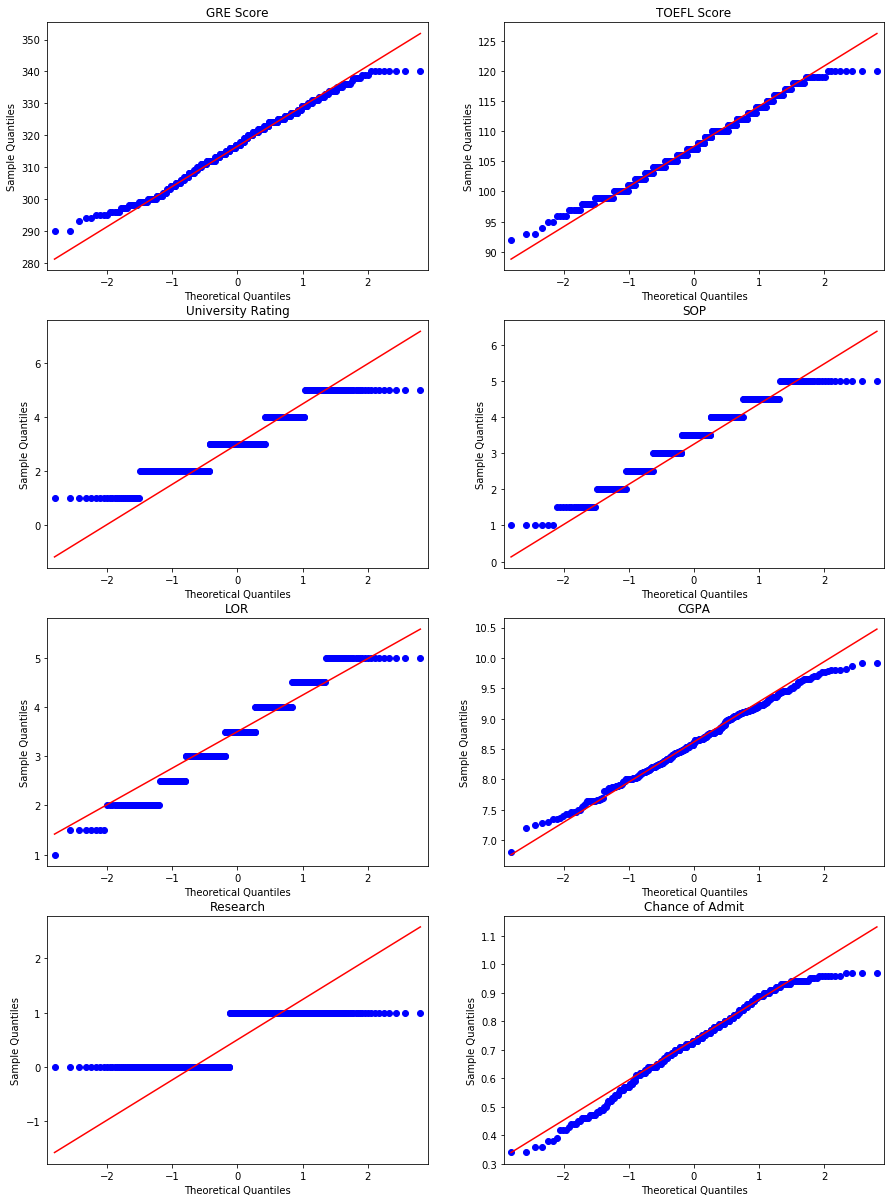

In [45]:
fig, axes = plt.subplots(nrows=4 ,ncols=2, figsize=[15,21])
for i in range(4):
    for j in range(2):
        sm.qqplot(df[df.columns[2*i+j]], line="q", ax=axes[i,j]);
        axes[i,j].set(title=df.columns[2*i+j])

# Multivariate

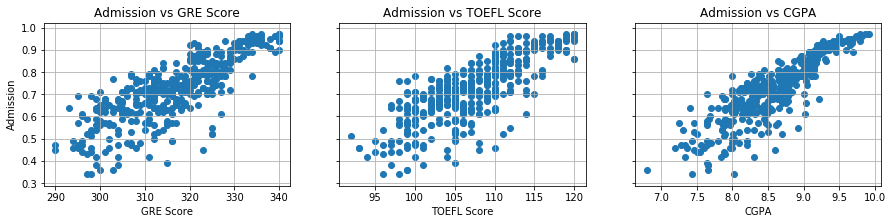

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[15,3], sharey=True)
lst = ["GRE Score", "TOEFL Score", "CGPA"]
for i in range(3):
    axes[0].set(ylabel="Admission")
    axes[i].scatter(df[lst[i]], df["Chance of Admit"])
    axes[i].set(title=f"Admission vs {lst[i]}", xlabel=f"{lst[i]}")
    axes[i].grid()

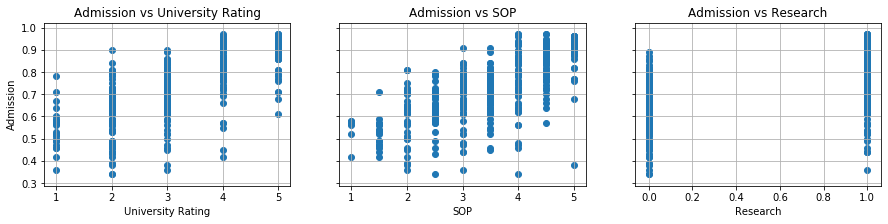

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[15,3], sharey=True)
lst = ["University Rating", "SOP", "Research"]
for i in range(3):
    axes[0].set(ylabel="Admission")
    axes[i].scatter(df[lst[i]], df["Chance of Admit"])
    axes[i].set(title=f"Admission vs {lst[i]}", xlabel=f"{lst[i]}")
    axes[i].grid()

# Model

In [5]:
targets = df["Chance of Admit"]
inputs = df.drop(["Chance of Admit"], axis=1)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
input_scaled = scaler.transform(inputs)

In [9]:
x_train, x_test, y_train,y_test = train_test_split(input_scaled, targets, test_size = 0.2, random_state = 365)

In [10]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_hat = reg.predict(x_train)

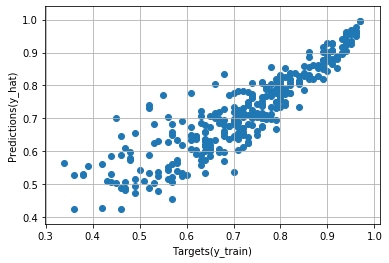

In [12]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size = 10)
plt.ylabel('Predictions(y_hat)', size = 10)
plt.grid()

In [13]:
import seaborn as sns

Text(0.5, 1.0, 'Residual PDFs')

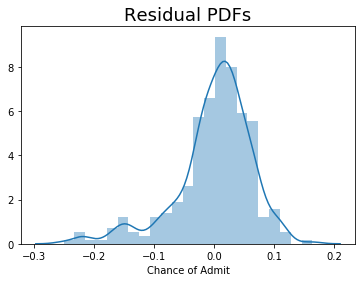

In [14]:
#Plot For Residuals
sns.distplot(y_train - y_hat)
plt.title('Residual PDFs', size =18)

In [15]:
# r^2
reg.score(x_train,y_train)

0.8022281178983117

In [16]:
reg.intercept_

0.7220513954561554

In [17]:
reg.coef_

array([ 0.01530428,  0.0162513 ,  0.0044667 , -0.00441126,  0.02239225,
        0.07438473,  0.01703824])

In [18]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,GRE Score,0.015304
1,TOEFL Score,0.016251
2,University Rating,0.004467
3,SOP,-0.004411
4,LOR,0.022392
5,CGPA,0.074385
6,Research,0.017038


In [19]:
y_hat_test = reg.predict(x_test)

Text(0, 0.5, 'Predictions(y_hat_test)')

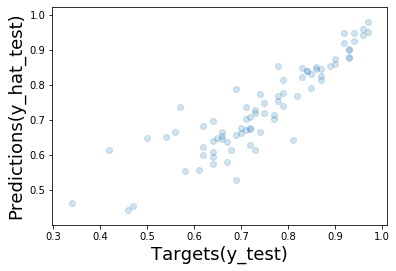

In [20]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_test)', size = 18)
plt.ylabel('Predictions(y_hat_test)', size = 18)

In [24]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,1.574910
1,1.909538
2,2.273766
3,2.096770
4,2.127437


In [25]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,1.574910,2.509290
1,1.909538,NaN
2,2.273766,NaN
3,2.096770,NaN
4,2.127437,NaN
...,...,...
75,1.946056,NaN
76,1.926277,NaN
77,2.019092,NaN
78,1.941515,NaN


In [26]:
y_test= y_test.reset_index(drop=True)

In [28]:
y_test.head()

0    0.47
1    0.50
2    0.83
3    0.79
4    0.78
Name: Chance of Admit, dtype: float64

In [30]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,1.574910,1.599994
1,1.909538,1.648721
2,2.273766,2.293319
3,2.096770,2.203396
4,2.127437,2.181472
...,...,...
75,1.946056,2.095936
76,1.926277,1.993716
77,2.019092,2.159766
78,1.941515,2.013753


In [31]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']


In [33]:
df_pf['Difference'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)


In [34]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '% 2f' % x)
df_pf.sort_values(by = ['Difference'])

,Predictions,Target,Residual,Difference
16,1.896181,1.896481,0.000300,0.015830
48,2.610569,2.611696,0.001127,0.043168
49,2.510393,2.509290,-0.001103,0.043947
17,2.115471,2.117000,0.001529,0.072226
30,2.314167,2.316367,0.002200,0.094967
59,1.861281,1.858928,-0.002353,0.126552
22,2.311614,2.316367,0.004753,0.205211
5,1.910987,1.915541,0.004554,0.237727
61,2.069917,2.075081,0.005164,0.248854
44,1.944116,1.934792,-0.009324,0.481912
